In [1]:
#List of libraries used for preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Read dataset into pandas dataframe
df = pd.read_csv("C:\\Users\\semen\\Desktop\\CmpE188Project\\FoodData.csv", encoding="ISO-8859-1")
df = df.fillna(0) #Fill in missing values with 0
df

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,Based
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.20,1 tbsp,0.0,0
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,50.489,23.426,3.012,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.40,1 tbsp,0.0,0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,61.924,28.732,3.694,256.0,12.0,1 tbsp,205.00,1 cup,0.0,0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,18.669,7.778,0.800,75.0,28.0,1 oz,17.00,1 cubic inch,0.0,0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,18.764,8.598,0.784,94.0,132.0,"1 cup, diced",113.00,"1 cup, shredded",0.0,0
5,1006,"CHEESE,BRIE",48.42,334,20.75,27.68,2.70,0.45,0.0,0.45,...,17.410,8.013,0.826,100.0,28.0,1 oz,144.00,"1 cup, sliced",0.0,0
6,1007,"CHEESE,CAMEMBERT",51.80,300,19.80,24.26,3.68,0.46,0.0,0.46,...,15.259,7.023,0.724,72.0,28.0,1 oz,246.00,1 cup,0.0,0
7,1008,"CHEESE,CARAWAY",39.28,376,25.18,29.20,3.28,3.06,0.0,0.00,...,18.584,8.275,0.830,93.0,28.0,1 oz,0.00,0,0.0,0
8,1009,"CHEESE,CHEDDAR",37.10,406,24.04,33.82,3.71,1.33,0.0,0.28,...,19.368,8.428,1.433,102.0,132.0,"1 cup, diced",244.00,"1 cup, melted",0.0,0
9,1010,"CHEESE,CHESHIRE",37.65,387,23.37,30.60,3.60,4.78,0.0,0.00,...,19.475,8.671,0.870,103.0,28.0,1 oz,0.00,0,0.0,0


In [2]:
#Instances of each class
print("Animal: ", (df.Based == 0).sum()) 
print("Plant: ", (df.Based == 1).sum())
print("Total: ", df.Based.count())

Animal:  2252
Plant:  1713
Total:  3965


In [3]:
df.describe(include='all')

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,Based
count,3965.000000,3965,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,...,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965,3965.000000,3965.0,3965.000000,3965.000000
unique,NaN,3964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,370,NaN,512.0,NaN,NaN
top,NaN,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3 oz,NaN,0.0,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,967,NaN,1367.0,NaN,NaN
mean,11412.688020,NaN,64.309776,180.478689,14.595982,9.306588,1.734419,10.173120,1.873165,2.401544,...,3.093108,3.665476,1.476287,61.387894,102.865322,NaN,176.338890,NaN,9.125851,0.432030
std,5472.578363,NaN,23.345539,136.206084,11.170652,13.163499,2.871200,17.166164,4.786026,6.948121,...,5.084539,6.021156,3.472945,165.092277,74.021794,NaN,386.631164,NaN,15.453343,0.495421
min,1001.000000,NaN,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,9105.000000,NaN,57.530000,82.000000,2.940000,0.500000,0.860000,0.000000,0.000000,0.000000,...,0.077000,0.044000,0.131000,0.000000,54.000000,NaN,0.000000,NaN,0.000000,0.000000
50%,11527.000000,NaN,68.500000,151.000000,16.140000,4.350000,1.130000,2.970000,0.000000,0.000000,...,1.222000,1.300000,0.490000,49.000000,85.000000,NaN,53.000000,NaN,0.000000,0.000000
75%,15097.000000,NaN,79.180000,245.000000,23.230000,12.710000,1.760000,13.380000,1.900000,1.630000,...,3.993000,4.898000,1.359000,81.000000,140.000000,NaN,236.000000,NaN,16.000000,1.000000


In [4]:
#Code adapted from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Find features highly correlated to the target class
df1 = df.drop(columns=['NDB_No', 'Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct'])
df1_std = StandardScaler().fit_transform(df1)
df_corr = pd.DataFrame(df1_std, columns=df1.columns)
corr_features = df_corr.corr()

#Correlation with the target variable
corr_target = abs(corr_features["Based"])

#Selecting features with a correlation of greater than 0.25
relevant_features = corr_target[corr_target>0.25].sort_values(ascending=False)
relevant_features

Based                1.000000
Protein_(g)          0.683217
Carbohydrt_(g)       0.557523
Niacin_(mg)          0.486689
Fiber_TD_(g)         0.440074
GmWt_1               0.371580
FA_Sat_(g)           0.362519
Cholestrl_(mg)       0.322422
Phosphorus_(mg)      0.296910
Zinc_(mg)            0.287994
Folate_Tot_(µg)      0.281374
Folate_DFE_(µg)      0.276206
Food_Folate_(µg)     0.274783
Lipid_Tot_(g)        0.272786
Magnesium_(mg)       0.266607
Choline_Tot_ (mg)    0.266595
Selenium_(µg)        0.261177
Sugar_Tot_(g)        0.253100
Name: Based, dtype: float64

In [5]:
df1.shape

(3965, 49)

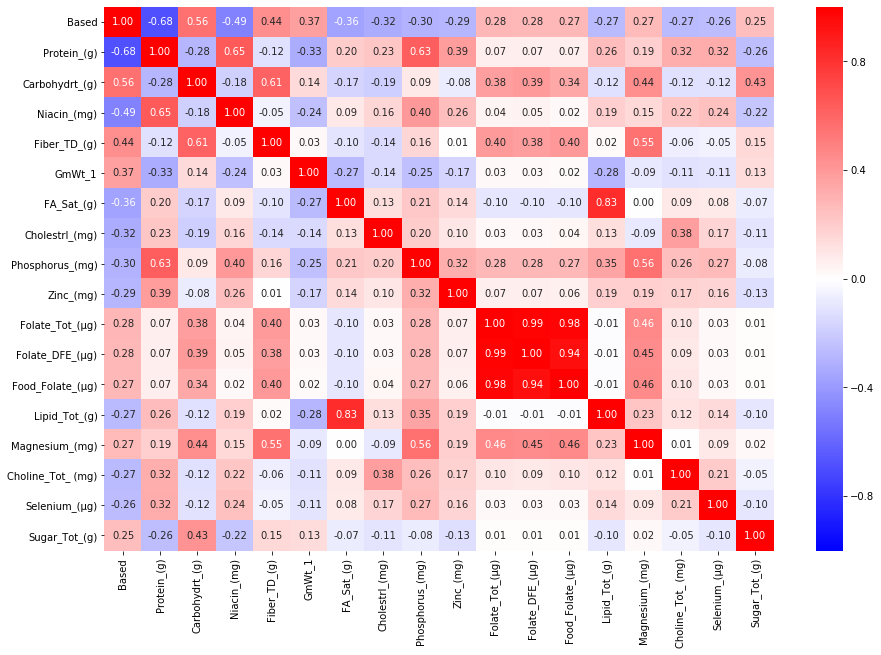

In [6]:
df_map = df_corr[relevant_features.index]
plt.figure(figsize=(15,10))
ax = sns.heatmap(data=df_map.corr(), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt = ".2f")

In [7]:
#New relevant feature set after removal of two columns of highly correlated "folate"
new_corr = df_corr.drop(columns=["Food_Folate_(µg)", "Folate_DFE_(µg)"])
corr_std1 = StandardScaler().fit_transform(new_corr)
df_corr1 = pd.DataFrame(corr_std1, columns=new_corr.columns)
corr_map = df_corr1.corr()
cor_target = abs(corr_map["Based"])
relevant_features = cor_target[cor_target>0.25].sort_values(ascending=False)
relevant_features

Based                1.000000
Protein_(g)          0.683217
Carbohydrt_(g)       0.557523
Niacin_(mg)          0.486689
Fiber_TD_(g)         0.440074
GmWt_1               0.371580
FA_Sat_(g)           0.362519
Cholestrl_(mg)       0.322422
Phosphorus_(mg)      0.296910
Zinc_(mg)            0.287994
Folate_Tot_(µg)      0.281374
Lipid_Tot_(g)        0.272786
Magnesium_(mg)       0.266607
Choline_Tot_ (mg)    0.266595
Selenium_(µg)        0.261177
Sugar_Tot_(g)        0.253100
Name: Based, dtype: float64

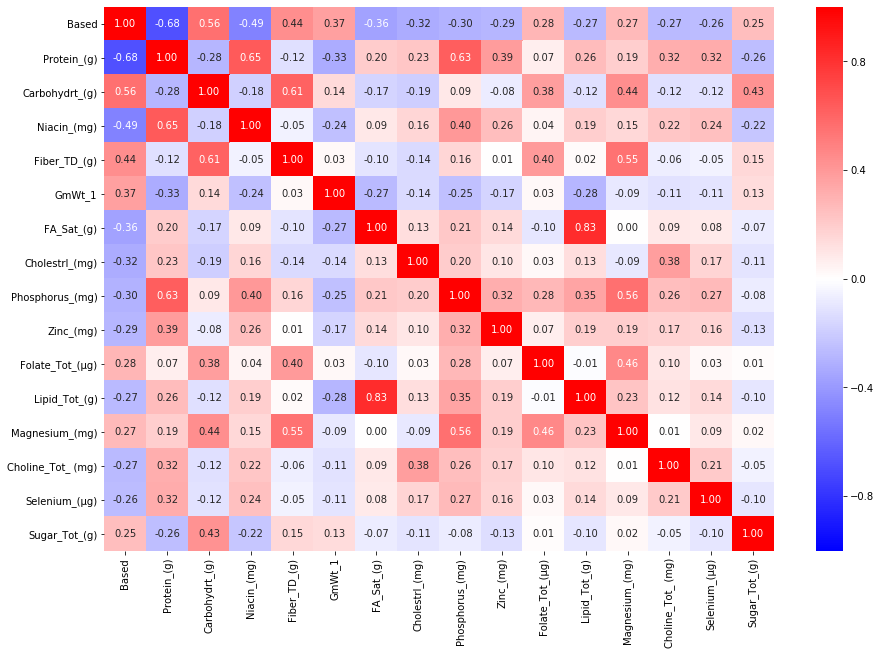

In [8]:
#New correlation map without folate
df_map = df_corr1[relevant_features.index]
plt.figure(figsize=(15,10))
ax = sns.heatmap(data=df_map.corr(), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt = ".2f")

In [9]:
df_exp = df.drop(columns=['NDB_No', 'Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct','Food_Folate_(µg)', 'Folate_DFE_(µg)'])
df_exp.to_csv("C:\\Users\\semen\\Desktop\\CmpE188Project\\FoodData_Preprocessed.csv")